In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
deliveries =  pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [20]:
ballsFaced={}
runs={}
sr={}
six={}
four={}
for index,row in deliveries.iterrows():
    ballsFaced[row['batsman']]=ballsFaced.get(row['batsman'],0)+1
    runs[row['batsman']]=runs.get(row['batsman'],0)+row['batsman_runs']
    sr[row['batsman']]=runs[row['batsman']]/ballsFaced[row['batsman']]*100
    six[row['batsman']]=six.get(row['batsman'],0)
    four[row['batsman']]=four.get(row['batsman'],0)
    if row['batsman_runs']==6:
        six[row['batsman']]=six.get(row['batsman'],0)+1
    elif row['batsman_runs']==4:
        four[row['batsman']]=four.get(row['batsman'],0)+1


# Balls faced, runs, strike rate, fours and sixes of each player

In [21]:
for k in sorted(ballsFaced):
    print(k,ballsFaced[k],runs[k],sr[k],four[k],six[k])

A Ashish Reddy 196 280 142.85714285714286 16 15
A Chandila 7 4 57.14285714285714 0 0
A Chopra 75 53 70.66666666666667 7 0
A Choudhary 20 25 125.0 1 1
A Flintoff 57 62 108.77192982456141 5 2
A Kumble 49 35 71.42857142857143 3 0
A Mishra 382 340 89.00523560209425 27 5
A Mithun 26 34 130.76923076923077 4 1
A Mukund 23 19 82.6086956521739 1 0
A Nehra 63 41 65.07936507936508 3 1
A Singh 10 2 20.0 0 0
A Symonds 781 974 124.71190781049937 74 41
A Uniyal 7 4 57.14285714285714 0 0
A Zampa 8 5 62.5 1 0
AA Bilakhia 88 69 78.4090909090909 5 0
AA Chavan 11 12 109.09090909090908 2 0
AA Jhunjhunwala 218 217 99.54128440366972 19 5
AA Noffke 12 9 75.0 1 0
AB Agarkar 160 179 111.87499999999999 13 5
AB Barath 43 42 97.67441860465115 5 1
AB Dinda 50 26 52.0 2 0
AB McDonald 103 123 119.41747572815532 9 4
AB de Villiers 2402 3486 145.12905911740216 287 158
AC Blizzard 91 120 131.86813186813185 21 2
AC Gilchrist 1555 2069 133.05466237942122 239 92
AC Thomas 19 20 105.26315789473684 1 1
AC Voges 143 181 126.5

LPC Silva 27 40 148.14814814814815 5 1
LR Shukla 358 405 113.12849162011173 33 16
LRPL Taylor 847 1017 120.07083825265643 66 46
M Ashwin 1 0 0.0 0 0
M Kaif 258 259 100.3875968992248 22 6
M Kartik 109 113 103.6697247706422 7 1
M Klinger 78 73 93.58974358974359 9 0
M Manhas 486 514 105.76131687242798 43 10
M Morkel 93 126 135.48387096774192 11 5
M Muralitharan 30 20 66.66666666666666 1 0
M Ntini 19 11 57.89473684210527 2 0
M Rawat 70 55 78.57142857142857 4 1
M Vijay 2092 2511 120.02868068833652 237 89
M Vohra 750 957 127.60000000000001 95 35
M de Lange 2 1 50.0 0 0
MA Agarwal 692 814 117.6300578034682 82 33
MA Khote 22 24 109.09090909090908 2 1
MA Starc 98 96 97.95918367346938 10 0
MC Henriques 769 969 126.00780234070221 87 27
MC Juneja 134 125 93.28358208955224 11 1
MD Mishra 213 237 111.26760563380283 24 8
MDKJ Perera 13 14 107.6923076923077 3 0
MEK Hussey 1648 1977 119.96359223300972 198 52
MF Maharoof 124 177 142.74193548387098 12 9
MG Johnson 157 151 96.17834394904459 8 7
MJ Clarke 

# As in the dataset there are two names for the team Rising Pune Supergiant one with s at the end and another without s at the end. So following function is defined to convert the name to one. Function name_correction will append s to all occurance of name of the team without s at the end in the given column. After defining the function, four columns are passed to the function one by one as given below.


In [3]:
def name_corrections(cols):
    val=cols[0]
    if val=='Rising Pune Supergiant':
        val='Rising Pune Supergiants'
    return val

In [4]:
matches['team1']=matches[['team1']].apply(name_corrections,axis=1)
matches['team2']=matches[['team2']].apply(name_corrections,axis=1)
matches['winner']=matches[['winner']].apply(name_corrections,axis=1)
matches['toss_winner']=matches[['toss_winner']].apply(name_corrections,axis=1)


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<AxesSubplot:xlabel='season', ylabel='count'>

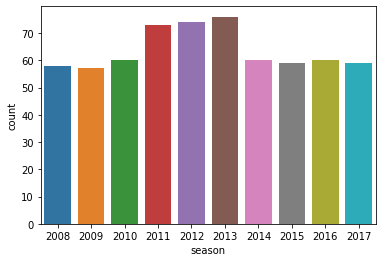

In [46]:
sns.countplot(matches['season'])

<AxesSubplot:>

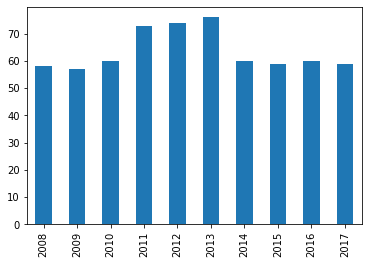

In [47]:
matches['season'].value_counts(sort=False).plot(kind='bar')

<BarContainer object of 10 artists>

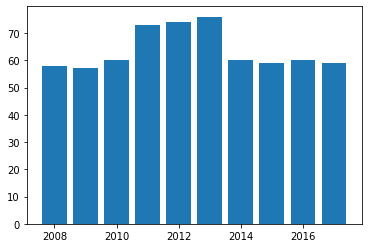

In [48]:
plt.bar(matches.sort_values(by='season')['season'].unique(),matches['season'].value_counts().sort_index())

<AxesSubplot:>

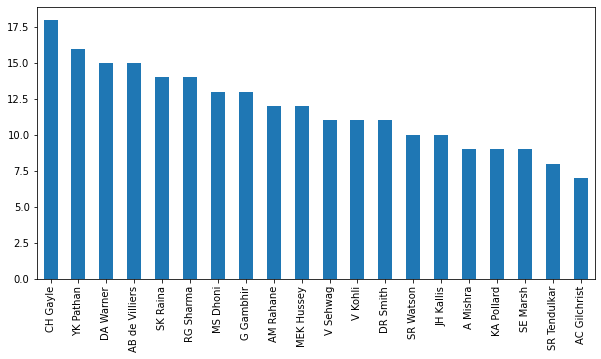

In [49]:
plt.figure(figsize=(10,5))
matches['player_of_match'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

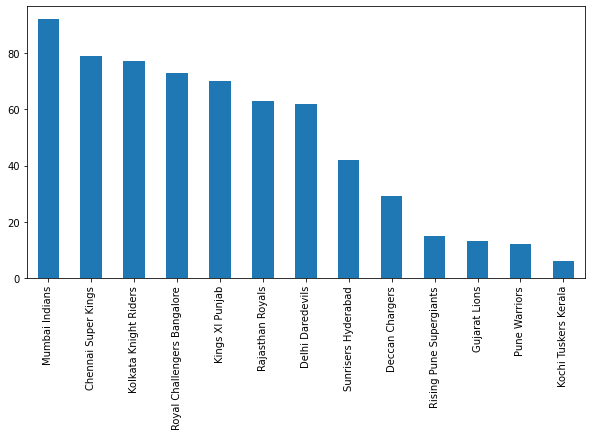

In [50]:
plt.figure(figsize=(10,5))
matches['winner'].value_counts().plot(kind='bar')

<AxesSubplot:>

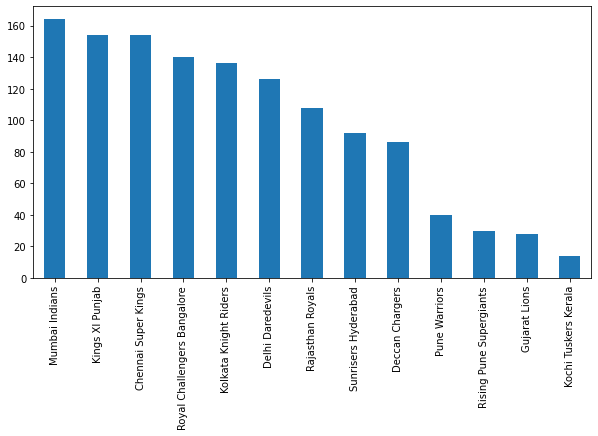

In [51]:
plt.figure(figsize=(10,5))
(matches['team1'].value_counts()+matches['team1'].value_counts()).plot(kind='bar')

In [65]:
#plt.figure(figsize=(10,5))
matches['winner'].value_counts().sort_index()

#(matches['winner'].value_counts()/(matches['team1'].value_counts()+matches['team1'].value_counts())*100).plot(kind='bar')

Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiants        15
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
Name: winner, dtype: int64

In [66]:
(matches['team1'].value_counts()+matches['team1'].value_counts()).sort_index()

Chennai Super Kings            154
Deccan Chargers                 86
Delhi Daredevils               126
Gujarat Lions                   28
Kings XI Punjab                154
Kochi Tuskers Kerala            14
Kolkata Knight Riders          136
Mumbai Indians                 164
Pune Warriors                   40
Rajasthan Royals               108
Rising Pune Supergiants         30
Royal Challengers Bangalore    140
Sunrisers Hyderabad             92
Name: team1, dtype: int64

In [54]:
matches['winner'].value_counts().sort_index()/((matches['team1'].value_counts()+matches['team1'].value_counts()).sort_index())*100

Chennai Super Kings            51.298701
Deccan Chargers                33.720930
Delhi Daredevils               49.206349
Gujarat Lions                  46.428571
Kings XI Punjab                45.454545
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          56.617647
Mumbai Indians                 56.097561
Pune Warriors                  30.000000
Rajasthan Royals               58.333333
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    52.142857
Sunrisers Hyderabad            45.652174
dtype: float64

In [55]:
matches['winner'].value_counts()/(matches['team1'].value_counts()+matches['team1'].value_counts())*100

Chennai Super Kings            51.298701
Deccan Chargers                33.720930
Delhi Daredevils               49.206349
Gujarat Lions                  46.428571
Kings XI Punjab                45.454545
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          56.617647
Mumbai Indians                 56.097561
Pune Warriors                  30.000000
Rajasthan Royals               58.333333
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    52.142857
Sunrisers Hyderabad            45.652174
dtype: float64

<AxesSubplot:>

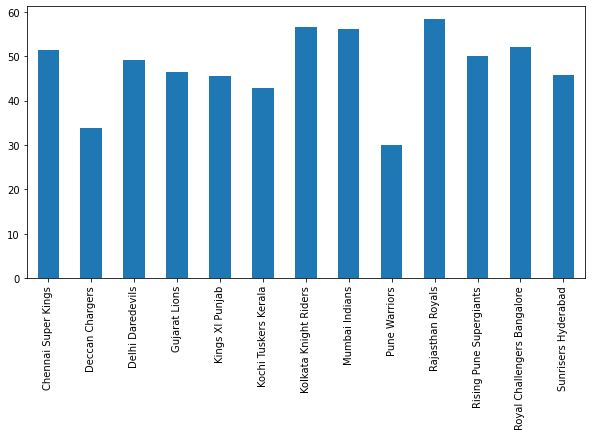

In [56]:
plt.figure(figsize=(10,5))
(matches['winner'].value_counts()/(matches['team1'].value_counts()+matches['team1'].value_counts())*100).plot(kind='bar')

In [7]:
venues=matches['venue'].unique()
venues

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

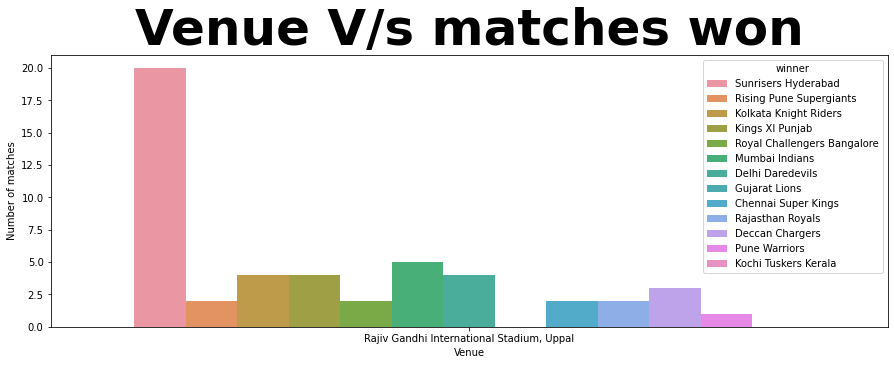

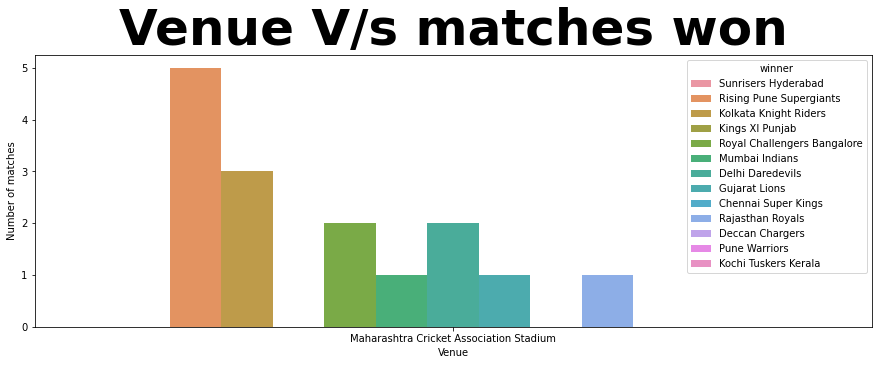

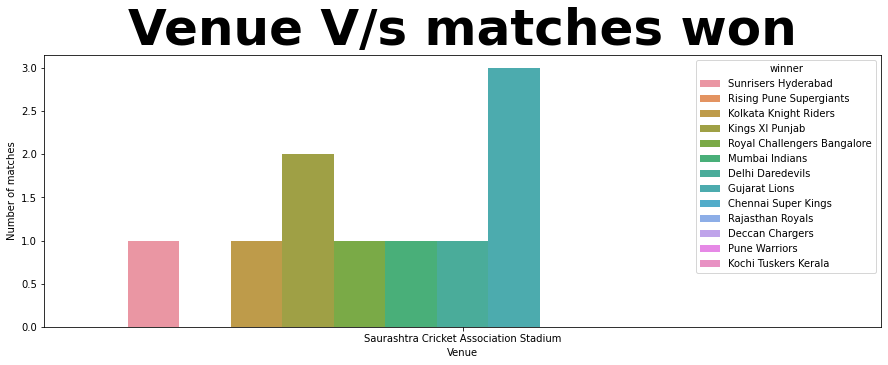

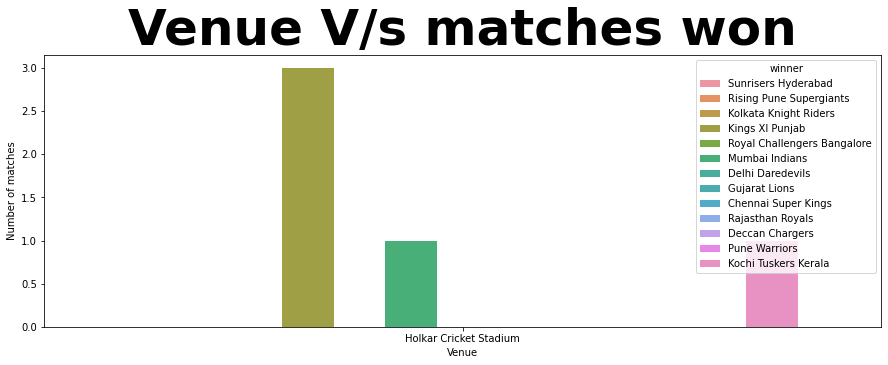

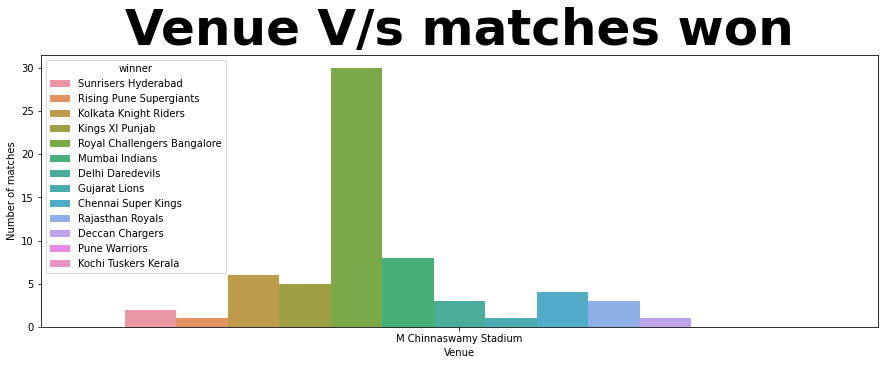

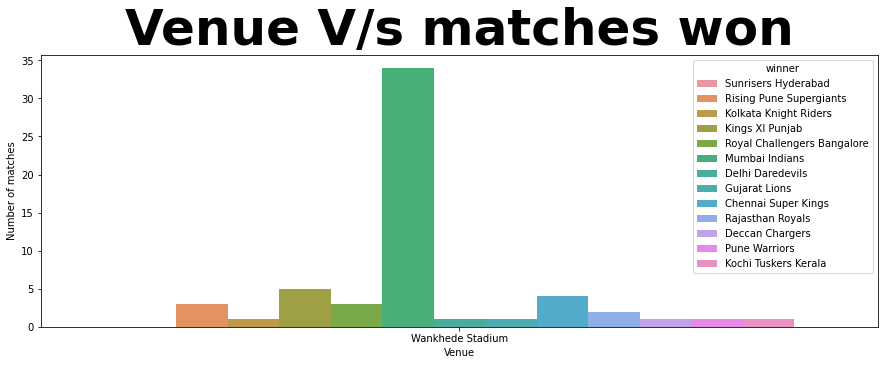

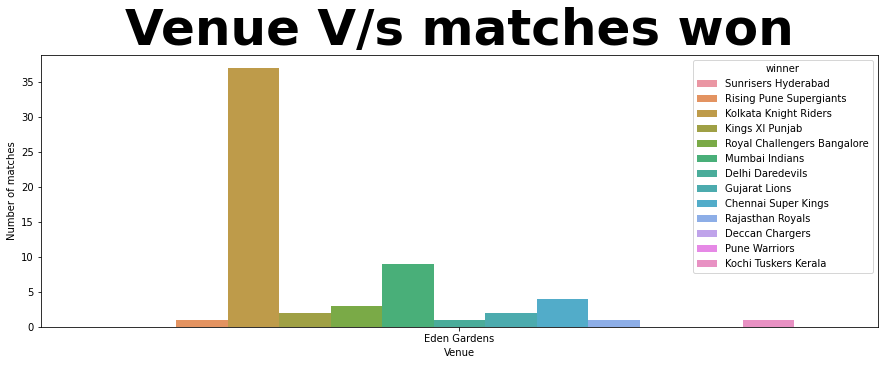

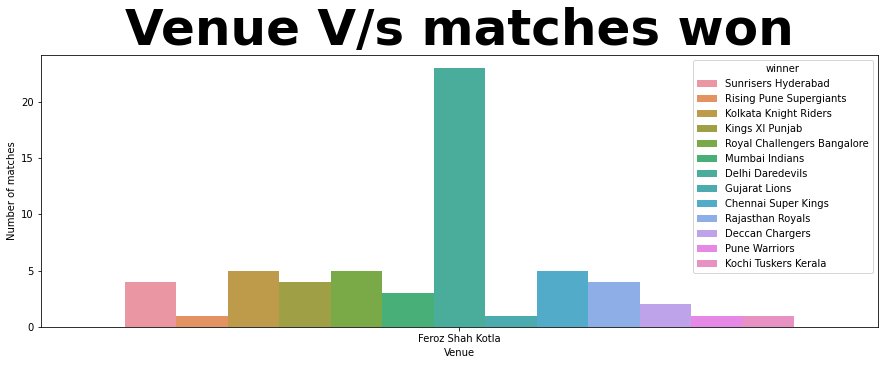

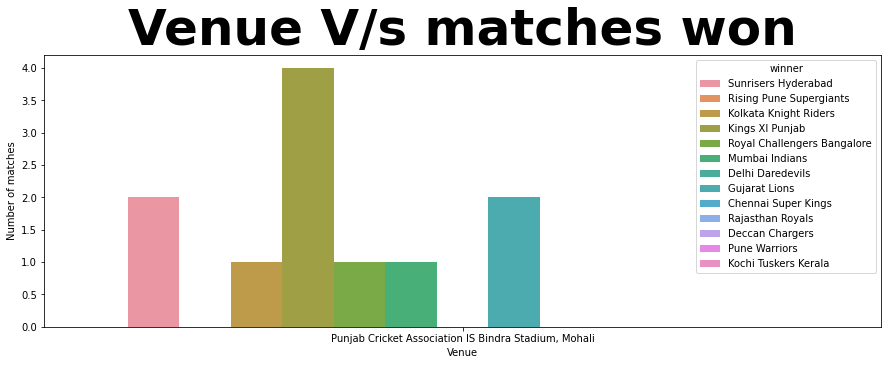

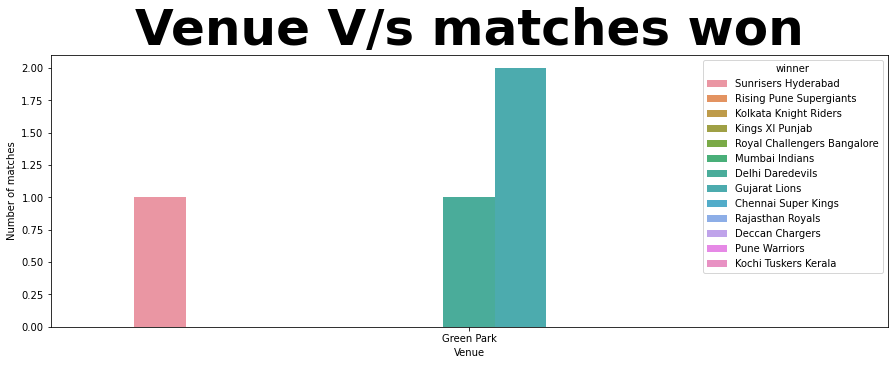

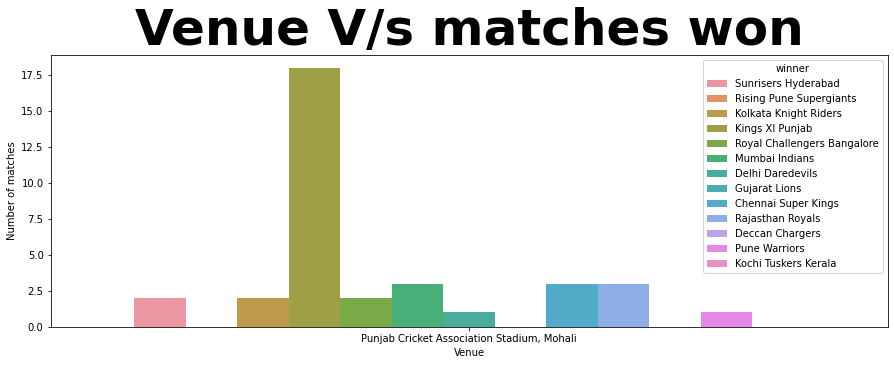

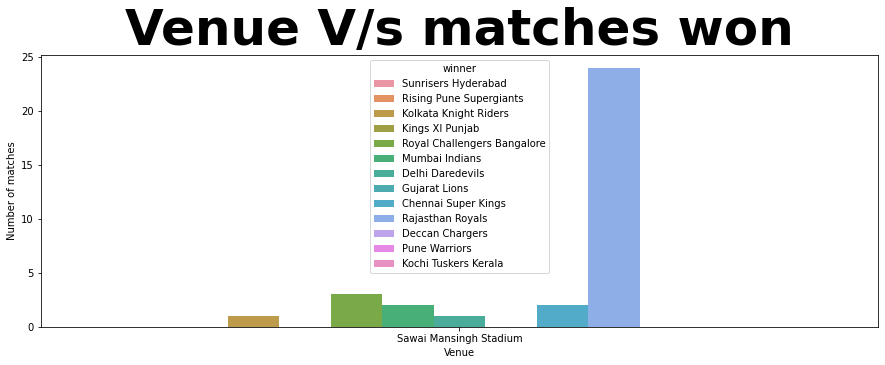

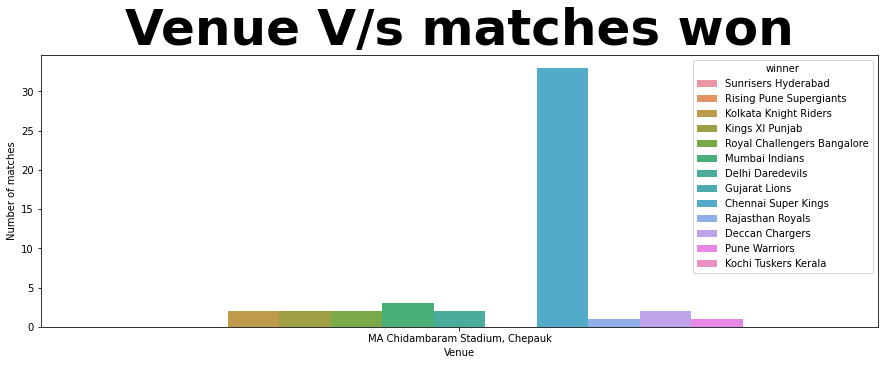

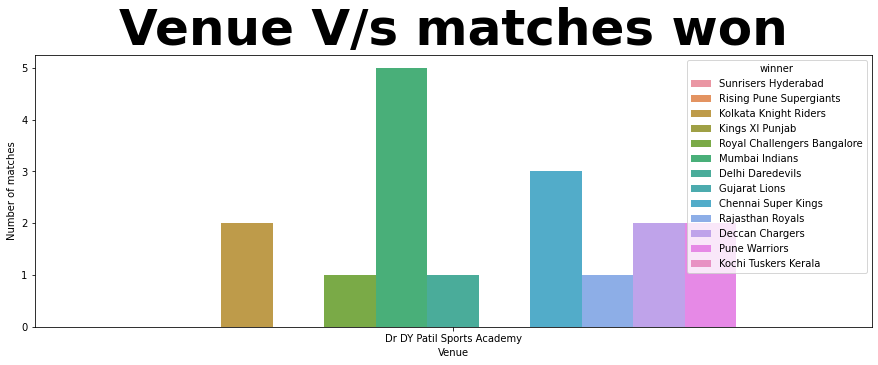

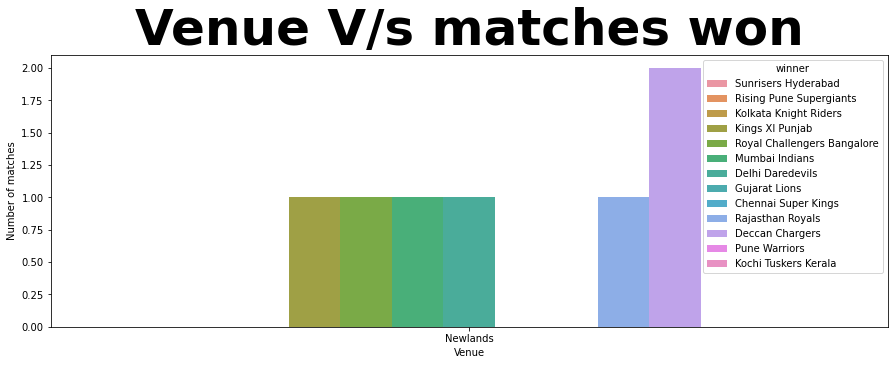

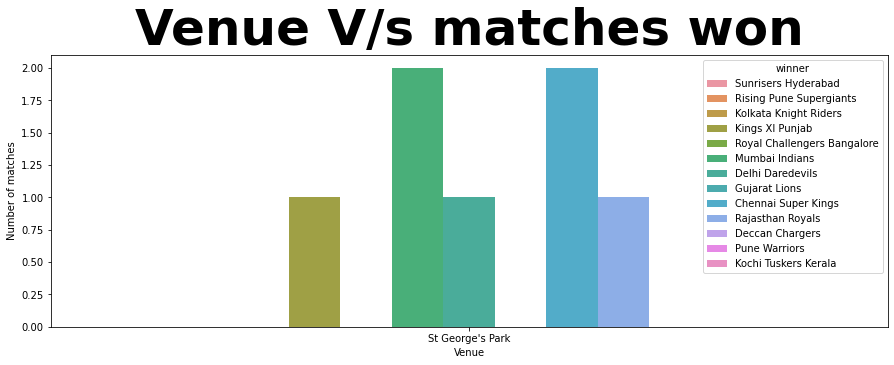

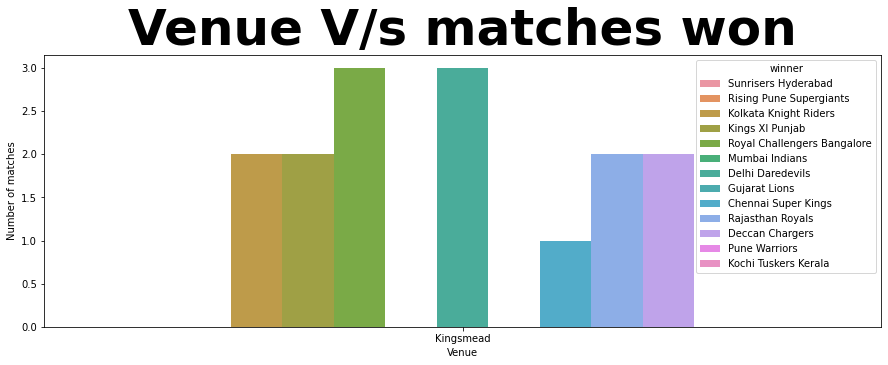

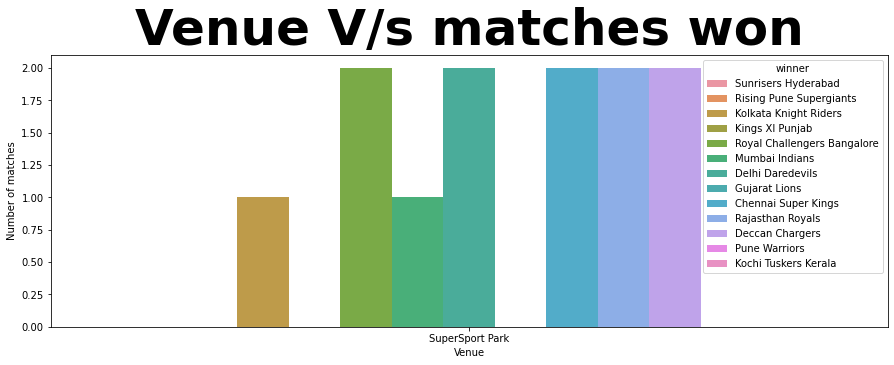

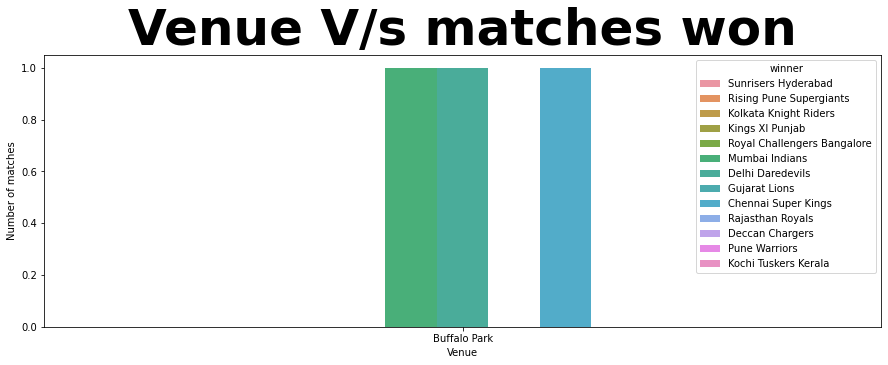

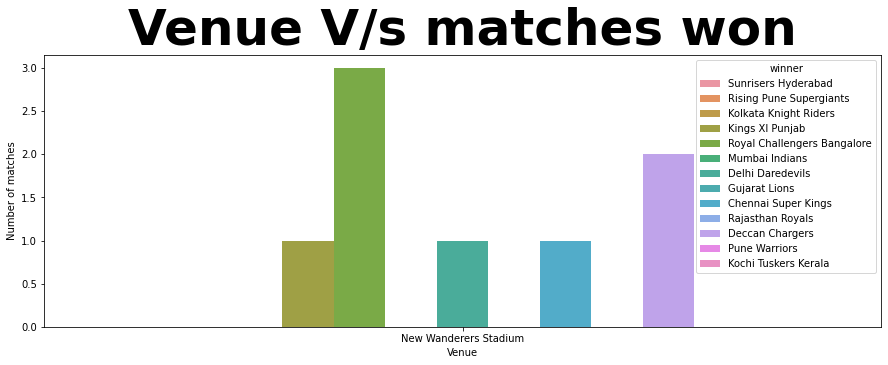

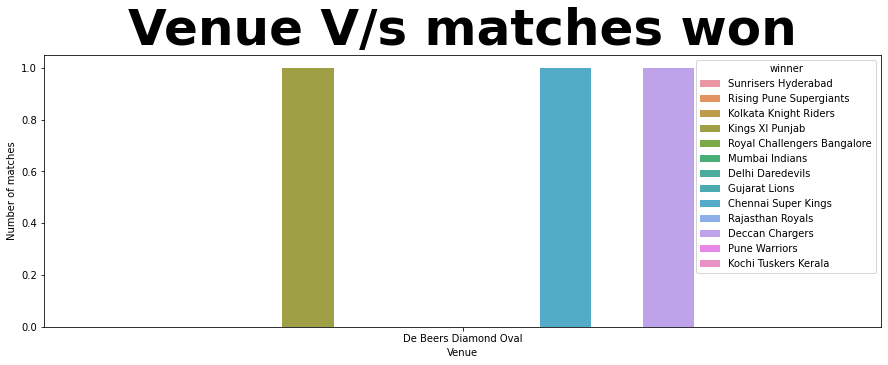

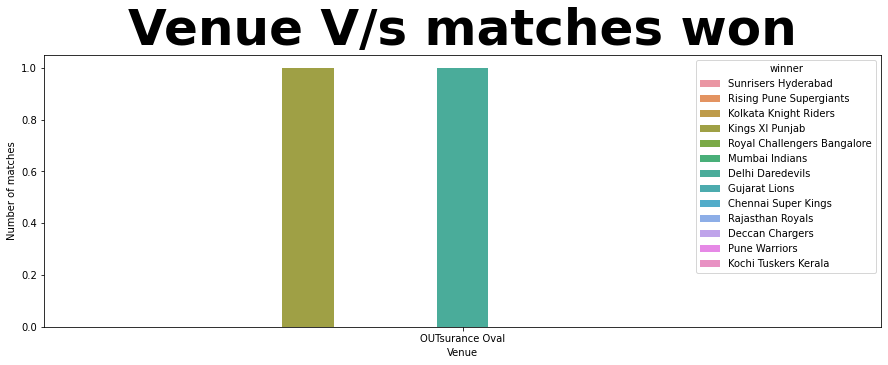

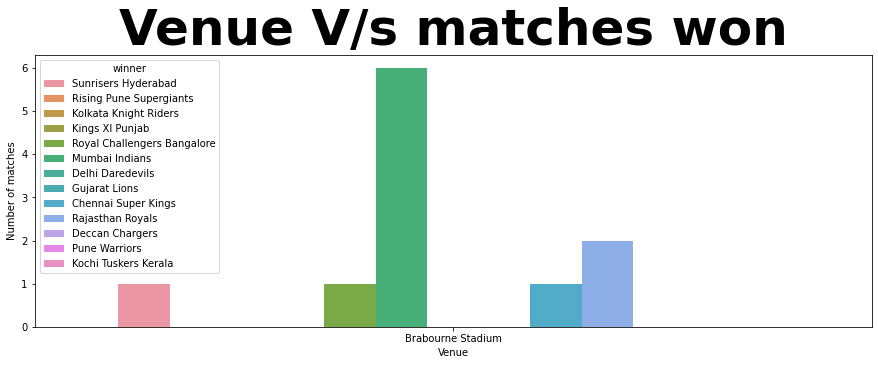

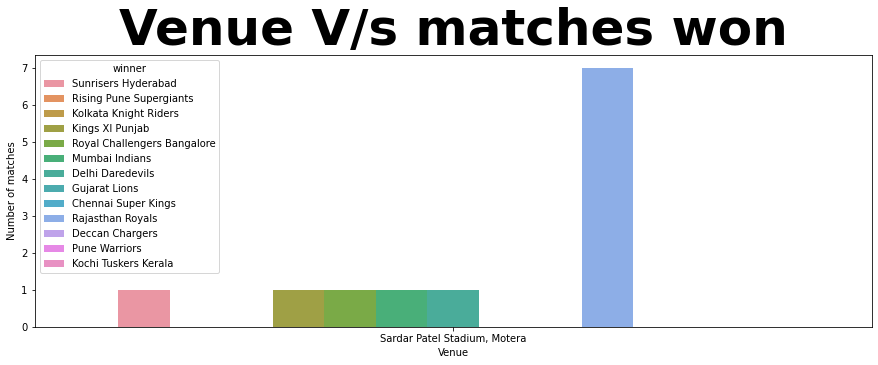

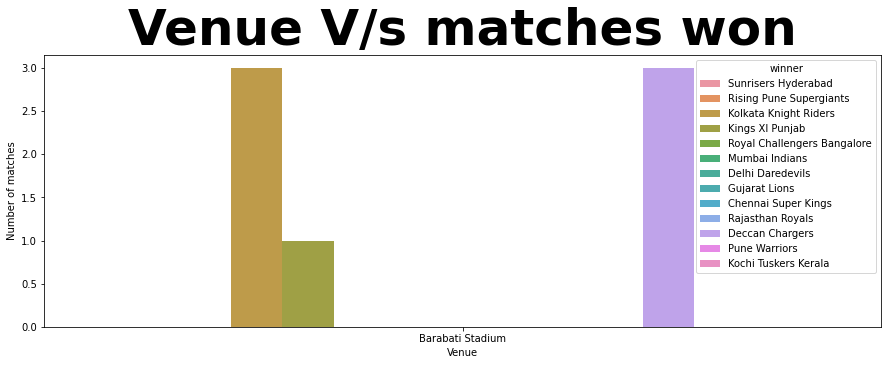

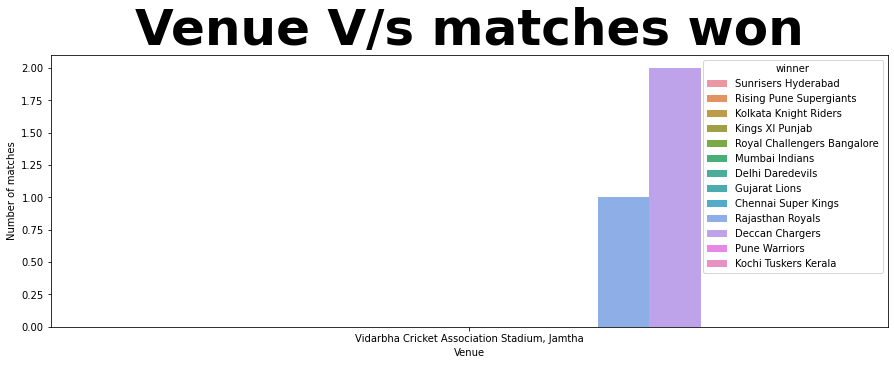

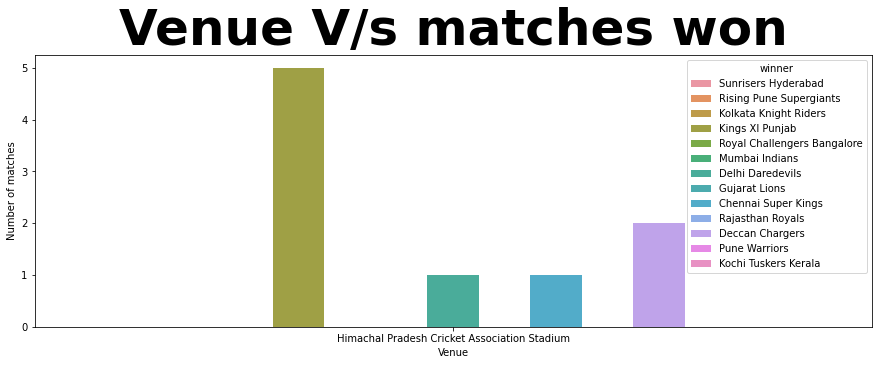

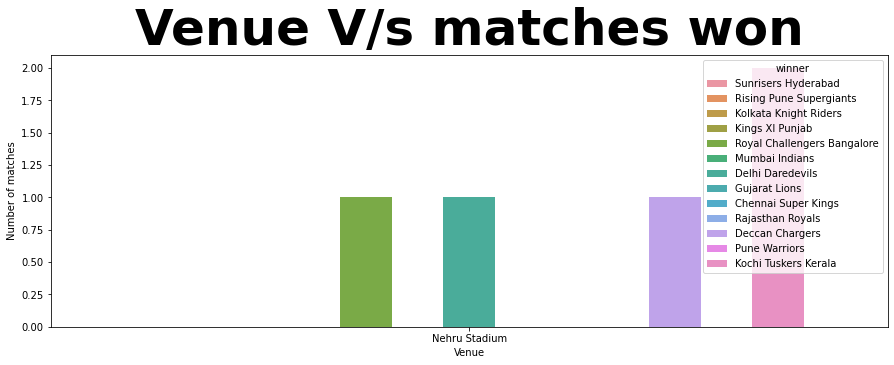

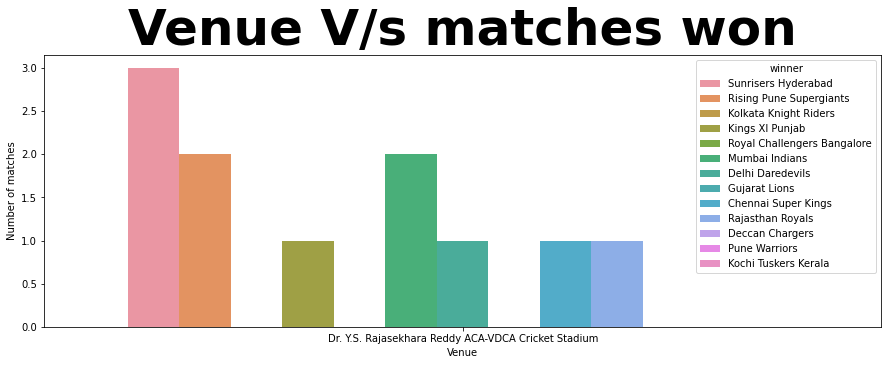

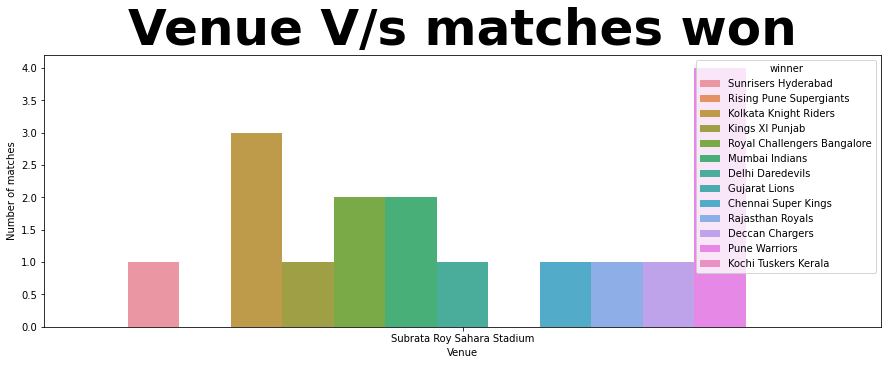

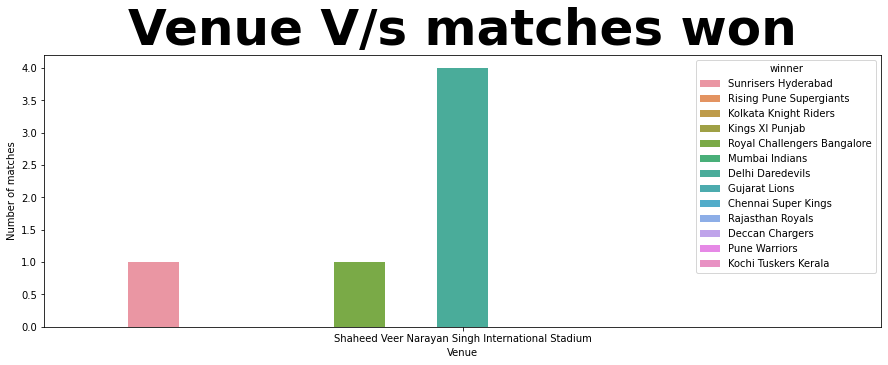

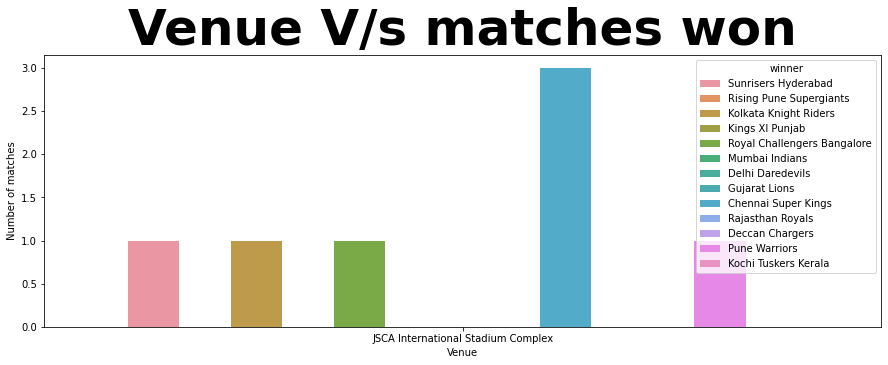

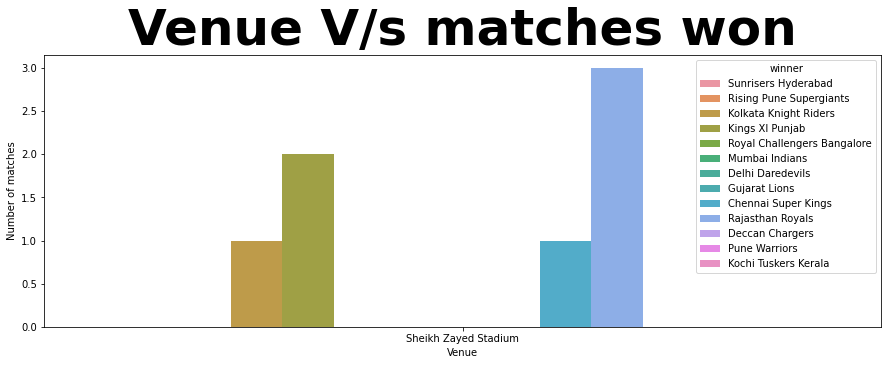

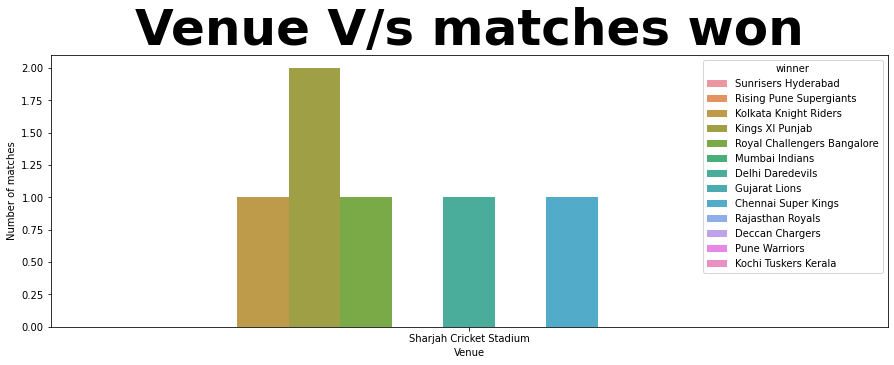

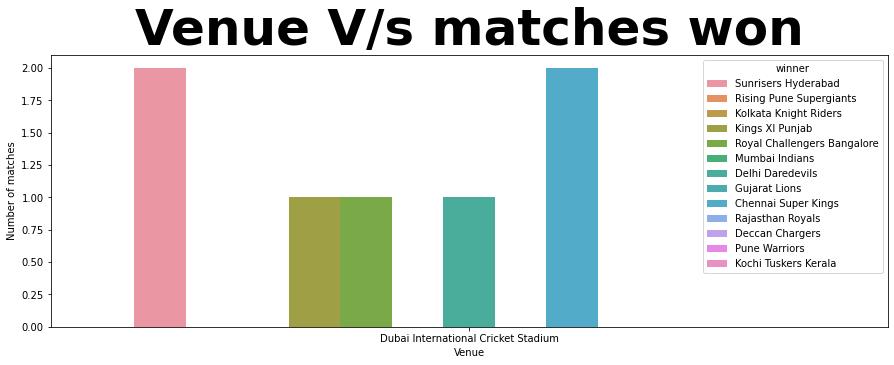

In [12]:
for x in venues:
    plt.figure(figsize=(15,5))
    sns.countplot(x=matches[matches['venue']==x]['venue'], hue='winner', data=matches)
    plt.ylabel('Number of matches')
    #plt.xticks(rotation=90)
    plt.xlabel('Venue')
    plt.title('Venue V/s matches won',size=50, fontweight="bold")
    plt.show()

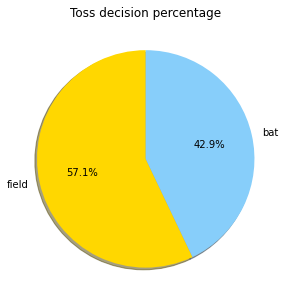

In [92]:
#https://www.kaggle.com/razamh/eda-ipl-dataset
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

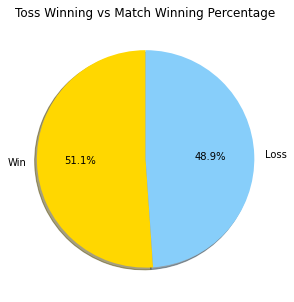

In [117]:
winner_count=len(matches[matches['winner']==matches['toss_winner']].index)
total_count=len(matches.index)
winner_percentage=winner_count/total_count*100
losers_percentage=100-winner_percentage
colors = ['gold', 'lightskyblue']
labels=np.array(['Win','Loss'])
plt.pie(np.array([winner_percentage,losers_percentage]),labels=labels,autopct='%1.1f%%', colors=colors,shadow=True,startangle=90)
plt.title("Toss Winning vs Match Winning Percentage")
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

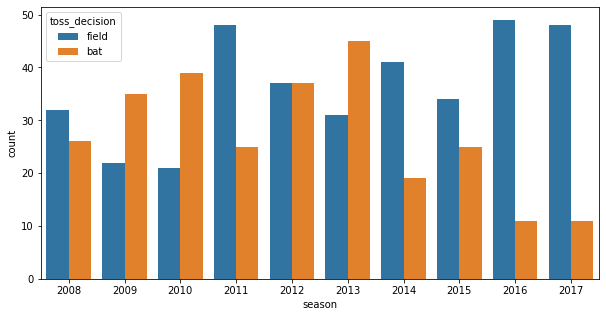

In [119]:
sns.countplot(matches['season'],hue=matches['toss_decision'])

In [122]:
#https://www.kaggle.com/razamh/eda-ipl-dataset     Winner  of each season
matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


# needs  to be learnt labeling very very  important analysis https://www.kaggle.com/razamh/eda-ipl-dataset

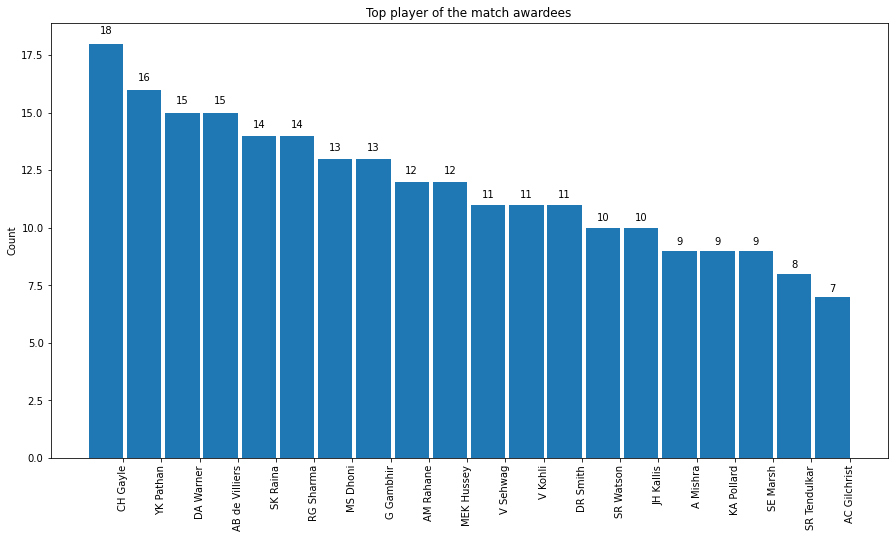

In [124]:
# create a function for labeling #
#https://www.kaggle.com/razamh/eda-ipl-dataset 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


temp_series = matches.player_of_match.value_counts()[:20]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()